# Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from library.sb_utils import save_file

In [2]:
data = pd.read_csv('../data/data_select_features_data.csv')

Let's check out the data.

In [3]:
data = data.drop(['EmployeeNumber'], axis=1)
data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobLevel,JobRole,...,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,2,Female,2,Sales Executive,...,Yes,11,3,0,8,0,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,Research Scientist,...,No,23,4,1,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,1,Laboratory Technician,...,Yes,15,3,0,7,3,0,0,0,0


In [4]:
data.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

### Encoding

#### Ordinal and Label Encoding

For eda purposes, I had all columns either ordinal or label encoded. This doesn't make a ton of sense since some of these features could be one hot encoded. I'll start off with my `clean_data` and label encoding the text binary nominal features and ordinal encoding the text ordinal features.

In [5]:
le = LabelEncoder()
enc = OrdinalEncoder()

In [6]:
le.fit(data['Attrition'])
num_attrition = le.transform(data['Attrition']) 

enc.fit(data[['BusinessTravel']])
num_travel = enc.transform(data[['BusinessTravel']])
num_travel = [item for sublist in num_travel for item in sublist]
num_travel = [int(i) for i in num_travel]

le.fit(data['Gender'])
num_gender = le.transform(data['Gender'])

le.fit(data['OverTime'])
num_overtime = le.transform(data['OverTime'])

In [7]:
data['Attrition'] = num_attrition
data['BusinessTravel'] = num_travel
data['Gender'] = num_gender
data['OverTime'] = num_overtime

In [8]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobLevel,JobRole,...,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,Sales,1,Life Sciences,2,0,2,Sales Executive,...,1,11,3,0,8,0,6,4,0,5
1,49,0,1,Research & Development,8,Life Sciences,3,1,2,Research Scientist,...,0,23,4,1,10,3,10,7,1,7
2,37,1,2,Research & Development,2,Other,4,1,1,Laboratory Technician,...,1,15,3,0,7,3,0,0,0,0
3,33,0,1,Research & Development,3,Life Sciences,4,0,1,Research Scientist,...,1,11,3,0,8,3,8,7,3,0
4,27,0,2,Research & Development,2,Medical,1,1,1,Laboratory Technician,...,0,12,3,1,6,3,2,2,2,2


This is a lot better. Time to one hot encode the remaining features.

#### One Hot Encoding

I'll start off by looking at which features might be good candidates for one hot encoding.

In [9]:
for col in data.columns:
    print(col, "-", len(set(data[col])))

Age - 43
Attrition - 2
BusinessTravel - 3
Department - 3
DistanceFromHome - 29
EducationField - 6
EnvironmentSatisfaction - 4
Gender - 2
JobLevel - 5
JobRole - 9
JobSatisfaction - 4
MaritalStatus - 3
MonthlyIncome - 1349
NumCompaniesWorked - 10
OverTime - 2
PercentSalaryHike - 15
PerformanceRating - 2
StockOptionLevel - 4
TotalWorkingYears - 40
TrainingTimesLastYear - 7
YearsAtCompany - 37
YearsInCurrentRole - 19
YearsSinceLastPromotion - 16
YearsWithCurrManager - 18


Of the remaining features, majority of them are ordinal, so a one hot encoding doesn't make a ton of sense. It looks like the best features to one hot encode are `Department`, `EducationField`, `JobRole` and `MaritalStatus`.

In [10]:
dummies = pd.get_dummies(data[['Department', 'EducationField', 'JobRole', 'MaritalStatus']])
dummies.head(3)

,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


21 new features. I'll tag the `dummies` dataframe onto `data` and drop the columns that have been encoded. 

In [11]:
data = data.drop(columns=['Department', 'EducationField', 'JobRole', 'MaritalStatus'])

In [12]:
one_hot_data = pd.concat([data, dummies], axis='columns')
one_hot_data.head(3)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1,2,0,2,4,5993,8,...,0,0,0,0,0,1,0,0,0,1
1,49,0,1,8,3,1,2,2,5130,1,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,2,4,1,1,3,2090,6,...,1,0,0,0,0,0,0,0,0,1


#### Handling Imbalance

From the EDA phase of this project, there was a clear data imbalance. I'll used SMOTE oversampling to handle this. But first, let's just recall what the imbalance looks like.


In [13]:
X = one_hot_data.copy()
X.drop('Attrition', axis=1, inplace=True)
y = one_hot_data['Attrition']

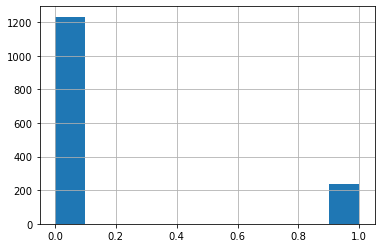

In [14]:
y.hist()
plt.show()

In [15]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)

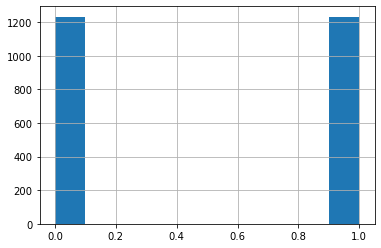

In [16]:
y.hist()
plt.show()

Data is perfectly balanced now. Let's create a new dataframe with the new X and y.

In [17]:
balanced_data = pd.concat([X,y], axis=1)

In [18]:
balanced_data.head(2)

,Age,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,41,2,1,2,0,2,4,5993,8,1,...,0,0,0,0,1,0,0,0,1,1
1,49,1,8,3,1,2,2,5130,1,0,...,0,0,0,1,0,0,0,1,0,0


In [19]:
balanced_data.shape

(2466, 41)

#### Feature Scaling

Next up is feature scaling. All the features have a different units and magnitude, so it is probably a good idea to scale them. I'll use a simple normalization.

In [20]:
X = balanced_data.copy()
X.drop('Attrition', axis=1, inplace=True)
y = balanced_data['Attrition']

In [21]:
norm = MinMaxScaler()

In [22]:
X_norm = norm.fit_transform(X)

In [23]:
X = pd.DataFrame(X_norm, columns=X.columns)
preprocessed_data = pd.concat([X, y], axis=1)

In [24]:
preprocessed_data.head()

,Age,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,0.547619,1.0,0.000000,0.333333,0.0,0.25,1.000000,0.262454,0.888889,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,0.738095,0.5,0.250000,0.666667,1.0,0.25,0.333333,0.217009,0.111111,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0.452381,1.0,0.035714,1.000000,1.0,0.00,0.666667,0.056925,0.666667,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.357143,0.5,0.071429,1.000000,0.0,0.00,0.666667,0.100053,0.111111,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.214286,1.0,0.035714,0.000000,1.0,0.00,0.333333,0.129489,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


#### Create Test and Training Sets

Time to create the test and training sets. I'll split the data 70-30 and make sure there is the same proportion of the attrited data in each subset. 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1, stratify=y)

#### Save the datasets.

In [26]:
# save the data to a new csv file
datapath = '../data'
save_file(preprocessed_data, 'preprocessed_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/preprocessed_data.csv"


In [27]:
save_file(X_test, 'X_test.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/X_test.csv"


In [28]:
save_file(X_train, 'X_train.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/X_train.csv"


In [29]:
save_file(y_train, 'y_train.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/y_train.csv"


In [30]:
save_file(y_test, 'y_test.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/y_test.csv"
